<h1><center>Laboratorio 10: Interpretabilidad 🤖</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Ignacio Meza, Gabriel Iturra
- Auxiliar: Sebastián Tinoco
- Ayudante: Arturo Lazcano, Angelo Muñoz

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Isidora Luck
- Nombre de alumno 2:


### **Link de repositorio de GitHub:** `https://github.com/IsidoraLuck/MDS7202.git`

### Indice

1. [Temas a tratar](#Temas-a-tratar:)
3. [Descripcción del laboratorio](#Descripción-del-laboratorio.)
4. [Desarrollo](#Desarrollo)

## Temas a tratar

- Clasificación usando `XGBoost`.
- Métodos Agnósticos Globales de Interpretabilidad (`Partial Dependence Plot`, `Permutation Feature Importance`)
- Métodos Agnósticos Locales de Interpretabilidad (`Scoped Rules`, `SHAP`)

## Reglas:

- **Grupos de 2 personas**
- Asistencia **obligatoria** a instrucciones del lab (viernes 16.15). Luego, pueden quedarse trabajando en las salas o irse.
- **No se revisarán entregas de personas ausentes**.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias.
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Generar un pipeline de clasificación con `XGBoost`.
- Implementar modelos de interpretabilidad para explicar el funcionamiento del modelo de clasificación.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre DataFrames.

# 1. Problemas Clínicos del Dr. Simi

<p align="center">
  <img src="https://gantz.cl/wp-content/uploads/2020/01/79024136_2718114448239059_7240913062570491904_o.jpg" width="350">
</p>

El reconocido **Dr. Simi**, famoso vendedor de medicamentos en latinoamerica, debido a la creciente prevalencia de enfermedades crónicas, como la diabetes, decidió abrir una clínica especializada en el tratamiento de esta enfermedad en nuestro país.

La clínica del Doctor Simi se convirtió en un lugar donde los pacientes con diabetes podrían recibir atención médica integral. El personal médico estaba compuesto por especialistas en endocrinología, nutrición y enfermería, todos capacitados en el manejo de la diabetes.

Sin embargo él se ha dado cuenta que los tiempos han cambiado y gracias a las tecnologías es posible generar mejores predicciones en la diabetes conociendo el historial médico de las personas. Por esto, el doctor se ha colocado una meta de incluir modelos de machine learning dentro de sus clínicas, para ello le ha solicitado crear un modelo capaz de predecir/clasificar diabetes pero le rogó que el desarrollo del modelo tuviera un especial enfoque en la interpretabilidad de lo que hace su modelo.

Para que usted pueda entrenar el modelo, Dr. Simi le ha entregado un dataset de todos los clientes que fueron detectados con diabetes a lo largo de la historia de la clinica. Con ello, adjunta el historial médico de las personas en forma de datos tabulares para que usted pueda realizar fácilmente la clasificación.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
path='/content/drive/MyDrive/diabetes_data.csv'

In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv(path)
df.head(4)

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0


In [4]:
df.dtypes

Age                     float64
Sex                     float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Stroke                  float64
HighBP                  float64
Diabetes                float64
dtype: object

In [5]:
df.describe()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,8.584055,0.456997,0.525703,0.975259,29.856985,0.475273,0.147810,0.703036,0.611795,0.788774,0.042721,2.837082,3.752037,5.810417,0.252730,0.062171,0.563458,0.500000
std,2.852153,0.498151,0.499342,0.155336,7.113954,0.499392,0.354914,0.456924,0.487345,0.408181,0.202228,1.113565,8.155627,10.062261,0.434581,0.241468,0.495960,0.500004
min,1.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,0.000000,1.000000,1.000000,29.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000
75%,11.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000
max,13.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,1.000000,1.000000


## 2. Clasificación de pacientes con diabetes (0.5 puntos)

<p align="center">
  <img src="https://media.tenor.com/QH--g3ZaSbsAAAAC/dr-simi-abrazo.gif" width="400">
</p>

En primer lugar, el reconocido doctor le pide entrenar un modelo de `XGBoost` utilizando como target la columna `Diabetes` del dataset `diabetes_data.csv`. Para el entrenamiento tome en cuenta **todos** los pasos necesarios para entrenar un modelo de aprendizaje supervisado vistos hasta la fecha (use `Pipeline`, `ColumnTransformer`, etc.), comente sus decisiones y los resultados obtenidos con el modelo. ¿Es acaso un buen predictor de diabetes?, ¿Qué buscan explicar las métricas utilizadas?, ¿las métricas utilizadas para medir la predictibilidad le permiten asegurar que su modelo haga una buena elección de las features?.

In [6]:
!pip install xgboost

**Manejo de Datos Categóricos:** Se convierten las variables categóricas en tipos de datos categóricos, ya que en caso de no hacerlo como son float serían escaladas más adelante en el proceso.



In [7]:
categorica = ['Sex', 'HighChol','CholCheck','Smoker', 'HeartDiseaseorAttack', 'PhysActivity','Fruits','Veggies','HvyAlcoholConsump',
              'DiffWalk', 'Stroke','HighBP','Diabetes']

for col in categorica:
    df[col] = df[col].astype('category')

df.dtypes

Age                      float64
Sex                     category
HighChol                category
CholCheck               category
BMI                      float64
Smoker                  category
HeartDiseaseorAttack    category
PhysActivity            category
Fruits                  category
Veggies                 category
HvyAlcoholConsump       category
GenHlth                  float64
MentHlth                 float64
PhysHlth                 float64
DiffWalk                category
Stroke                  category
HighBP                  category
Diabetes                category
dtype: object

**Revisión de datos**: Se intenta observar si hay valores faltantes, no los hay posteriormente se revisa la distribución del BMI, ya que tiene un máximo muy alto para lo que representa.

In [8]:
df.isnull().sum()

Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
HighBP                  0
Diabetes                0
dtype: int64

In [9]:
import plotly.express as px
fig = px.box(df, x='BMI', points="all", title='Gráfico de Caja - BMI')

fig.update_traces(marker=dict(color='rgb(8,81,156)', size=8),
                  line=dict(color='rgb(8,81,156)', width=1.5))

fig.show()

**Manejo de Outliers:** Se eliminan una gran parte de los outliers del conjunto de datos utilizando la condición `df['BMI'] < 60`.


In [10]:
df=df[df['BMI']<60]

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, confusion_matrix

In [12]:
# Separar características y target
X = df.drop('Diabetes', axis=1)
y = df['Diabetes']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identificar columnas numéricas y categóricas
numeric_features = X_train.select_dtypes(include=['float64']).columns
categorical_features = X_train.select_dtypes(include=['category']).columns

# Crear transformaciones para columnas numéricas y categóricas
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Crear el ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Construir el pipeline con el clasificador XGBoost
pipeline= Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', XGBClassifier(random_state=2))])

# Entrenar el modelo
pipeline.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = pipeline.predict(X_test)

**Métricas y Matriz de Confusión:** Se decide utilizar métricas clave para evaluar el desempeño en clasificación como la exactitud (Accuracy), el área bajo la curva ROC (ROC-AUC), y la sensibilidad (Recall). Además, has presentado una matriz de confusión, lo cual es crucial para entender el rendimiento del modelo a nivel tipos de errores.

Accuracy: 0.7527874440735743
ROC-AUC: 0.8276109915121378
Recall: 0.802732707087959


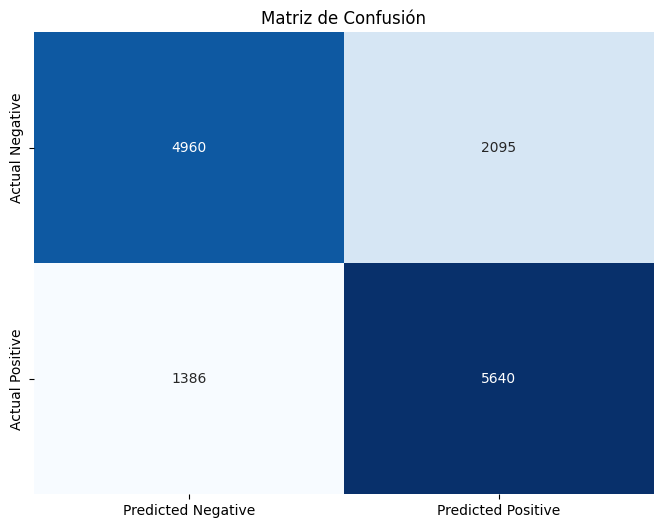

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, pipeline.predict_proba(X_test)[:, 1])
recall = recall_score(y_test, y_pred)

# Print the additional metrics
print(f'Accuracy: {accuracy}')
print(f'ROC-AUC: {roc_auc}')
print(f'Recall: {recall}')

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a DataFrame for the confusion matrix
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])

# Plot using seaborn for a non-interactive plot
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión')
plt.show()


Basándonos en la exactitud (Accuracy: 0.75) que mide la proporción de predicciones correctas en general, el área bajo la curva ROC (ROC-AUC: 0.827) que evalúa la capacidad del modelo para distinguir entre las clases, y la sensibilidad (Recall: 0.80) que se centra en la capacidad del modelo para identificar los casos positivos (donde el predictor coincide con la realidad), el modelo parece ser bastante decente, pero no es buena, ya que las métricas no superan el 0,83, lo que indica que aún puede mejorar, esto podría ser mediante la optimización de parametros e hiperparametros del modelo. Si destaco que tuvo menos error al identificar casos que presentaran diabetes realmente.


Las métricas utilizadas para medir la predictibilidad no necesariamente permiten asegurar que el modelo haga una buena elección de las features. Las métricas que estás utilizando evalúan el rendimiento global del modelo pero no ofrecen información detallada sobre la importancia de las características individuales.


### 3. Importancia de las features con XGBoost (0.5 puntos)

<p align="center">
  <img src="https://media.tenor.com/5JAj5_IiagEAAAAd/dr-simi-dr-simi-dance.gif" width="400">
</p>

Para añadir el toque de interpretabilidad que Dr. Simi le pide, se le pide calcular la **importancia de las features** del modelo entrenado utilizando todos los métodos (*weight*, *cover*, *gain*) que posee xgboost usando `plot_importance`. ¿Los resultados obtenidos con los diferentes métodos son compatibles?, comente sus resultados y a que se debe la igualdad o desigualdad que ve en los resultados. Finalmente, ¿las importancias obtenidas son suficientes para obtener la interpretabilidad de un modelo que utiliza árboles? ¿Qué debilidad presenta este método?

<Figure size 1000x800 with 0 Axes>

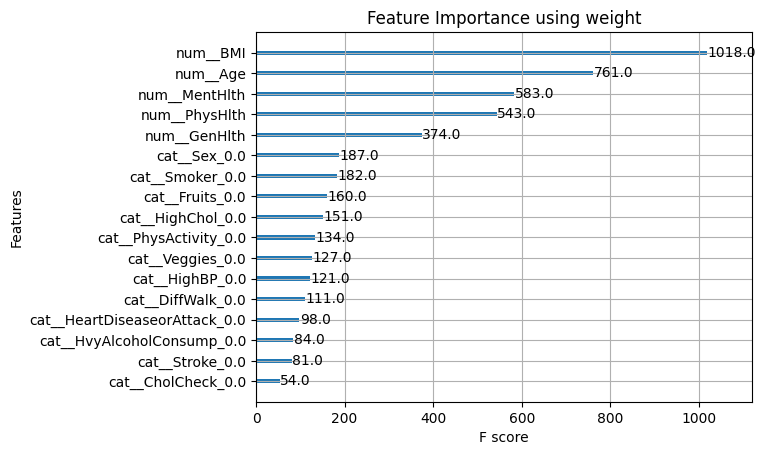

<Figure size 1000x800 with 0 Axes>

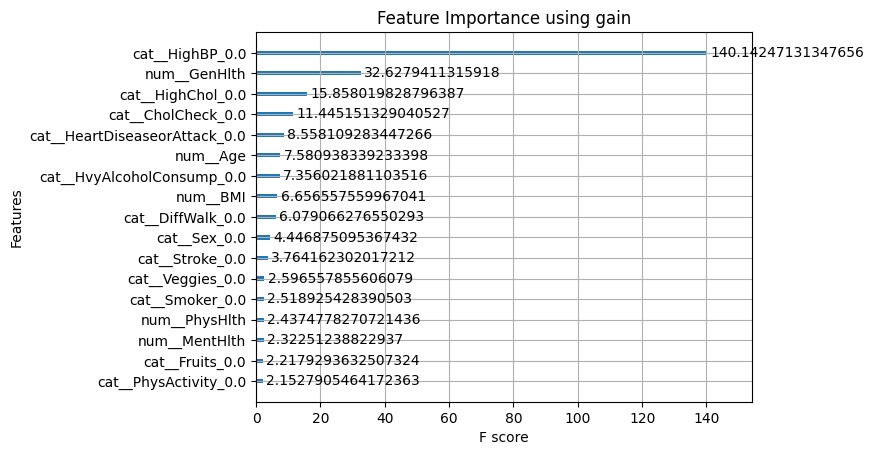

<Figure size 1000x800 with 0 Axes>

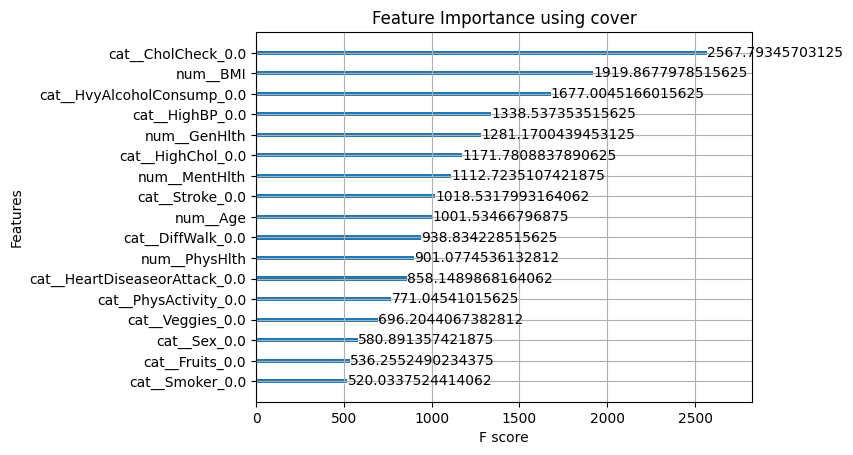

In [14]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
import pandas as pd

# Obtener el modelo entrenado del pipeline
xgb_model = pipeline.named_steps['classifier']

# Obtener el preprocesador del pipeline
preprocessor = pipeline.named_steps['preprocessor']

transformed_example = preprocessor.transform(X_train.head())

feature_names = list(preprocessor.get_feature_names_out())

# Asignar los nombres de las características al modelo XGBoost
xgb_model.get_booster().feature_names = feature_names

# Métodos de importancia de características: 'weight', 'gain', 'cover'
methods = ['weight', 'gain', 'cover']

for method in methods:
    plt.figure(figsize=(10, 8))
    plot_importance(xgb_model, importance_type=method, max_num_features=len(feature_names), title=f'Feature Importance using {method}')
    plt.show()

**Resultados:** Estos presentan una desigualdad entre las features más importantes, esto es normal de observar en los resultados de los diferentes métodos de importancia de características, pues las diferentes formas en que cada método mide la importancia varia, *weight* mide el peso en el árbol contando el número de veces que una característica aparece en todos los árboles del modelo, *cover* la cobertura mide la cantidad de datos que se benefician de una característica. Es la suma de la importancia de la característica para cada árbol, ponderada por el número de veces que se utiliza la característica en esos árboles. Finalmente, *gain* mide la mejora en la precisión del modelo debido a una característica. Es el cambio en la pérdida (loss) cuando se agrega una característica al modelo.

La interpretabilidad de un modelo que utiliza árboles se beneficia de la información proporcionada por estos métodos, pues permite identificar las características más relevantes para la toma de decisiones, lo cual es valioso en contextos donde la explicabilidad es importante.

Una debilidad de estos métodos es que no proporcionan necesariamente la dirección de la relación entre la característica y la variable objetivo. Es decir, no te dicen si un aumento en el valor de la característica resultará en un aumento o disminución en la probabilidad de la clase positiva.


## 4. Métodos Agnósticos Globales (1.0 puntos)

<p align="center">
  <img src="https://media.tenor.com/JcRHtjVuXN8AAAAC/dr-simi-farmacias-similares.gif" width="400">
</p>

Para mitigar los problemas encontrados en la sección anterior, Dr. Simi le pide implementar un **método de permutación** que le permita observar la importancia de las features. Visualice los resultados de este método en un gráfico. Para que su modelo sea consistente, repita el proceso **30 veces** y verifique la desviación estándar de sus resultados (¿Qué señala está?). Además, responda las siguientes preguntas:


- ¿Cómo mide la importancia de las features su propuesta?
- ¿Qué features tienen un mayor impacto en la salida del modelo?. Comente las 5 primeras, ¿Tienen sentido?
- ¿Cómo cambian sus conclusiones con respecto a las features importances del punto anterior?
- Nombre y explique 3 ventajas y 3 desventajas del método implementado.

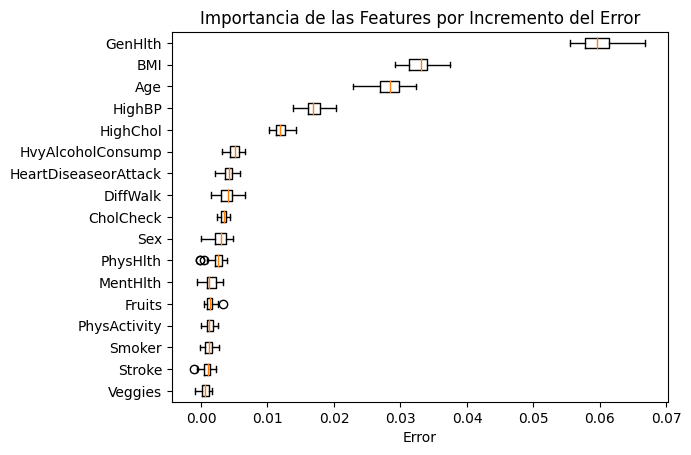

In [15]:
from sklearn.inspection import permutation_importance

# Calcular la importancia de las características por permutación
result = permutation_importance(pipeline, X_test, y_test, n_repeats=30, random_state=42)

# Ordenar los índices de las características por la importancia media
perm_sorted_idx = result.importances_mean.argsort()

# Crear un gráfico de boxplot para visualizar la importancia de las características
plt.boxplot(result.importances[perm_sorted_idx].T, vert=False, labels=X_test.columns[perm_sorted_idx])
plt.title("Importancia de las Features por Incremento del Error")
plt.xlabel('Error')
plt.show()


La desviación estándar proporciona una medida de la variabilidad de las importancias obtenidas a lo largo de las repeticiones del proceso de permutación. En este caso específico, realizas el proceso de permutación 30 veces, y la desviación estándar se calcula a partir de los resultados obtenidos en estas repeticiones. Teniendo que una desviación estándar alta indica que las importancias de características son diferentes entre las repeticiones. Si la desviación estándar es alta para una característica en particular, significa que su importancia varía considerablemente cuando se permutan los valores, lo que sugiere que esa característica tiene un impacto significativo en el rendimiento del modelo. Mientras que una desvuación estándar baja indica que la importancia de la o las variales es/son consistente/s.

La importancia de las características se mide mediante el método de permutación. Se evalúa la importancia de cada característica al permutar sus valores y observar cómo afecta el rendimiento del modelo. La idea es comparar el rendimiento del modelo en datos originales con el rendimiento en datos permutados.

Las caracteristicas con más relevancia son GenHlth, BMI, Age, HghBP y HighChol.

Las importancias basadas en permutación proporcionan una medida más robusta y realista de la contribución de cada característica al modelo. A diferencia de las métricas específicas de XGBoost, el método de permutación considera interacciones complejas entre características.

#### Ventajas del Método de Permutación:

1. **Robustez:** Es un método robusto y agnóstico al modelo, lo que significa que se puede aplicar a cualquier modelo de aprendizaje supervisado sin asumir una relación lineal.

2. **Interpretación Directa:** Proporciona una medida directa de la importancia de las características al evaluar cómo afecta la permutación de cada característica al rendimiento del modelo.

3. **Manejo de Correlaciones:** El método de permutación puede manejar correlaciones en el sentido de evaluar la importancia de cada característica de forma independiente al permutarla. Es decir, si dos características están correlacionadas, el método de permutación evaluará su importancia de manera individual, proporcionando una medida de la importancia para cada una.

#### Desventajas del Método de Permutación:

1. **Computacionalmente Costoso:** Puede ser computacionalmente costoso, especialmente para conjuntos de datos grandes, ya que implica ajustar el modelo múltiples veces.

2. **Dependencia del Tamaño del Conjunto de Datos:** La interpretación puede depender del tamaño del conjunto de datos. Pequeños conjuntos de datos pueden dar lugar a estimaciones más inestables.

3. **Pérdida de Información de Interacciones:** Puede perder información sobre interacciones entre características, ya que evalúa la importancia de cada característica de manera aislada.


## 5. Métodos Agnósticos Locales (2.0 puntos)

<p align="center">
  <img src="https://i.makeagif.com/media/1-27-2017/fBrzT8.mp4" width="400">
</p>

### 5.1 Calculando Shap Values (0.4 puntos)

Alegre por saber cómo funciona el modelo de predicción a nivel general, Dr. Simi le pide ahora interpretar las predicciones de su modelo a nivel de paciente (es decir, desde un punto de vista **local**). Para esto, el ilustre farmacéutico le pide calcular los *shap values* de su modelo. ¿Qué representa cada número en su resultado? ¿Es posible atribuir un significado a la positividad/negatividad de cada valor?

In [16]:
!pip install shap

In [17]:
import warnings
warnings.filterwarnings("ignore", message=".*The 'nopython' keyword.*")

[00:28:24] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


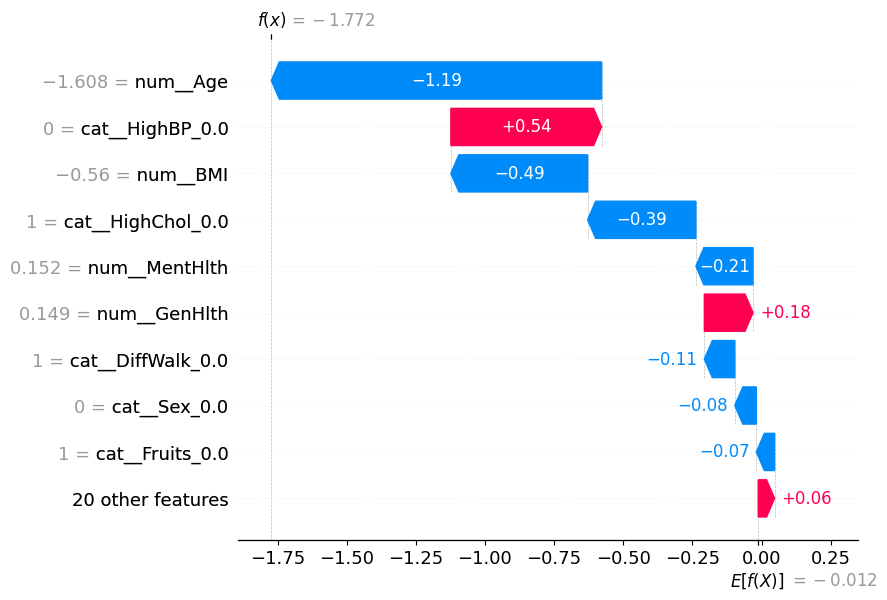

In [30]:
import shap

X_train_transformed = pipeline.named_steps['preprocessor'].transform(X)

# Obtener los nombres de las características transformadas
feature_names_transformed = list(preprocessor.get_feature_names_out())

explainer = shap.Explainer(xgb_model, feature_names=feature_names_transformed)

# Calcular los valores SHAP
shap_values = explainer(X_train_transformed)

# Visualización para la primera instancia
shap.plots.waterfall(shap_values[0])

Cada número en el resultado de los Shap values representa la contribución de una característica específica al cambio en la predicción del modelo en comparación con la predicción promedio del modelo para todas las instancias.

En los shap values podemos encontrar estos puntos claves para entenderlos, primero el signo, si es positivo para una característica, indica que la presencia de esa característica contribuye a aumentar la predicción en comparación con la predicción promedio, si es negativo, indica que la presencia de esa característica contribuye a disminuir la predicción en comparación con la predicción promedio. El valor indica el aporte en la contribución.


### 5.2 Aporte local (0.4 puntos)

Usando los *shap values* calculados, grafique el **aporte** de las diferentes variables para las instancias **1**, **9** y **150**, interprete sus resultados y responda:
- ¿Qué variables afectan de manera positiva/negativa a la probabilidad de poseer diabetes?
- ¿Existe algún patrón común entre las instancias analizadas?
- ¿Es posible generalizar estas conclusiones a todo el dataset?

[00:26:48] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


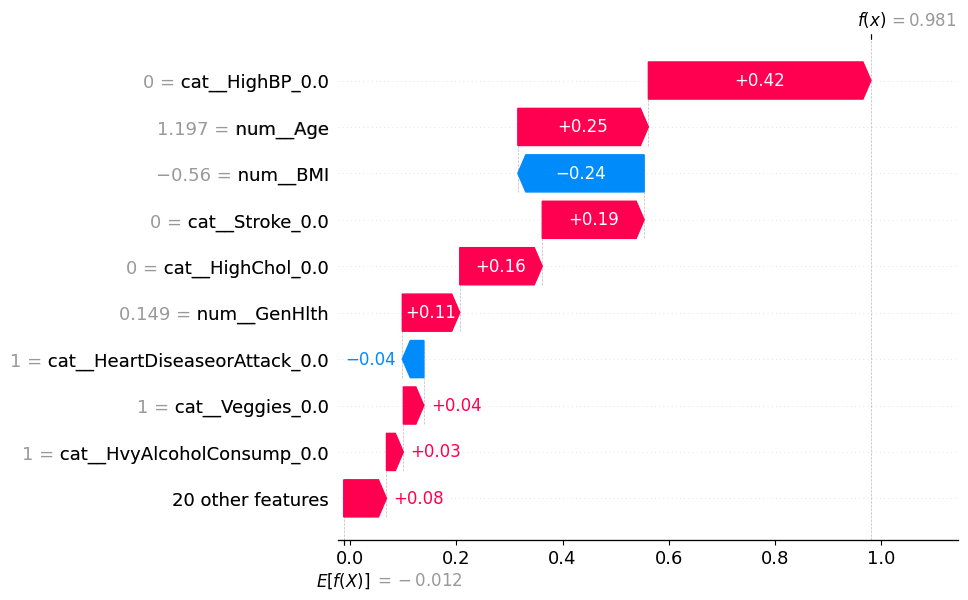

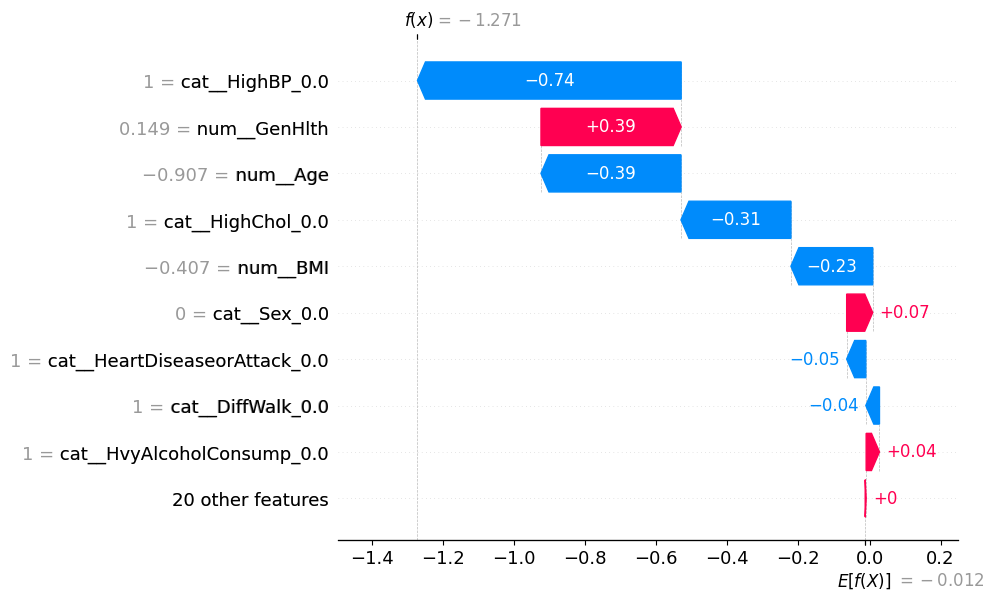

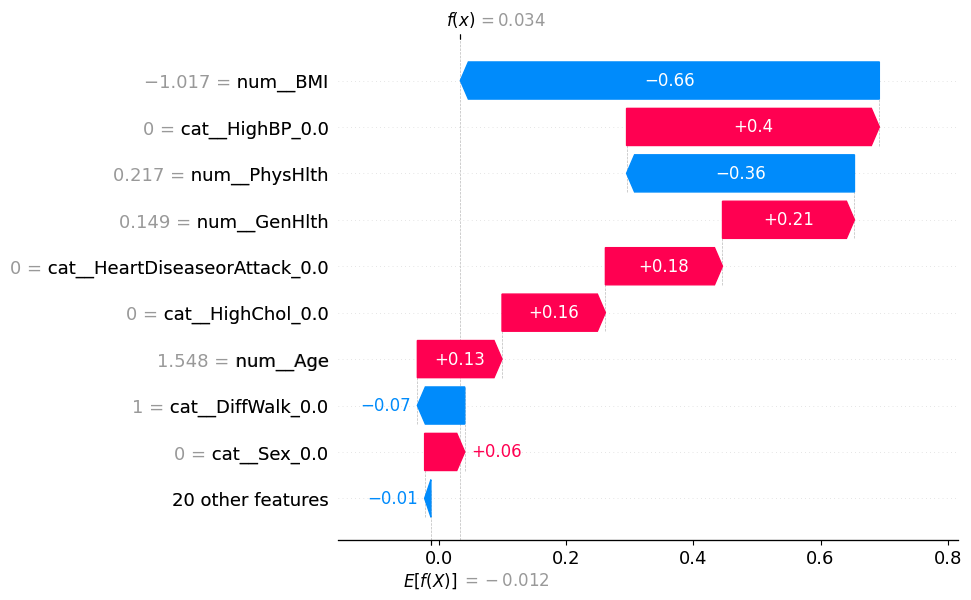

In [29]:
X_train_transformed = pipeline.named_steps['preprocessor'].transform(X)
feature_names_transformed = list(preprocessor.get_feature_names_out())

explainer = shap.Explainer(xgb_model, feature_names=feature_names_transformed)
shap_values = explainer(X_train_transformed)

instances = [1, 9, 150]
for i in instances:
    shap.plots.waterfall(shap_values[i])

En el gráfico se puede observar que las features más relevantes que contribuyan positivamente o negativamente a la probabilidad de tener diabetes va cambiando según la instancia, en general aparecen variables como age, bmi, highchol0, highBP0, entre otros, sin embargo para casi todas las variables su contribución varia según instancia.


En el gráfico se puede ver el BMI contribuye negativamente a la probabilidad de tener diabetes, de la misma manera pertenecer al sexo 0, influye positivamente en la probabilidad de tener diabetes. Las otras features no mantienen patrones.


Las interpretaciones basadas en Shap values no necesariamente se pueden generalizar ya que son específicas para cada instancia. Se pueden observar patrones entre distintas instancias, pero el impacto de las variables puede variar entre diferentes subgrupos de datos.

### 5.3 Aporte global (0.4 puntos)

Genere ahora una visualización donde se grafique el aporte de cada feature a nivel **global** e interprete sus resultados. ¿Qué diferencias existen con las conclusiones generadas a nivel de instancia?

[00:25:04] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
[00:25:05] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


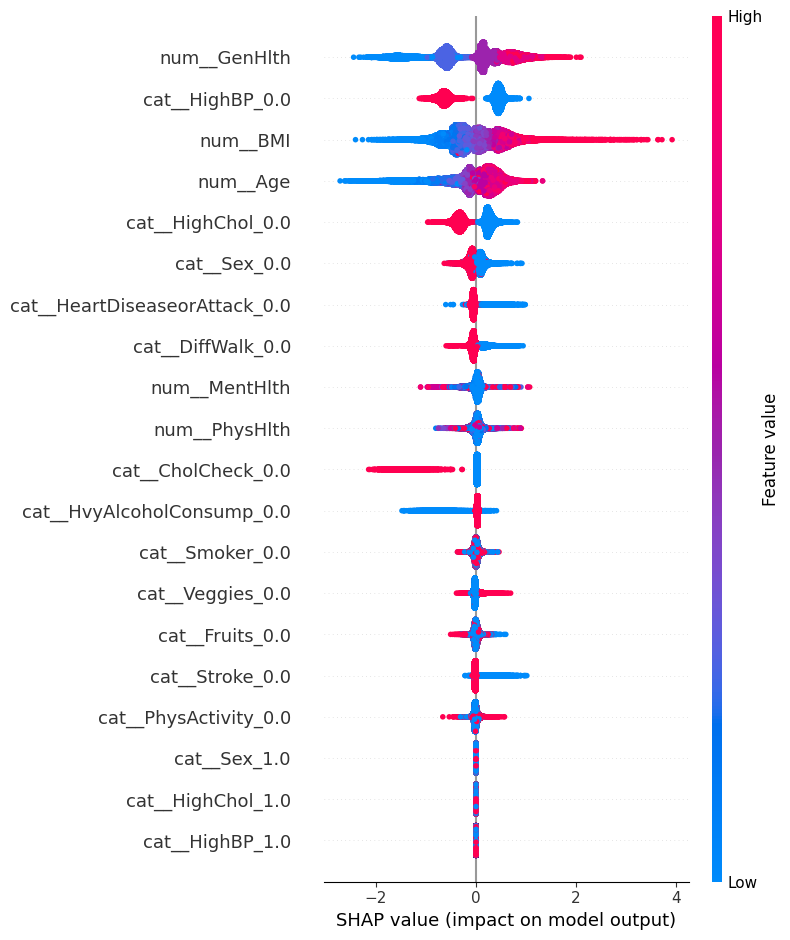

In [28]:
X_train_transformed =pipeline.named_steps['preprocessor'].transform(X)
feature_names_transformed = list(pipeline.named_steps['preprocessor'].get_feature_names_out())

explainer = shap.Explainer(xgb_model, feature_names=feature_names_transformed)
shap_values = explainer(X_train_transformed)

shap.summary_plot(shap_values, feature_names=feature_names_transformed)

Tenemos que las variables cambian, además tenemos que ahora podemos identificar diferencias entre tener un valor bajo o alto en una misma variable. Concluyendo que valores altos en genhealth influyen positivamente en la probabilidad de tener diabetes, se ve el mismo efecto al considerar las variables de age y bmi. Por otra parte se tiene que un alto HighBP0 influye negativamente en la probabilidad, mientras que un bajo HighBP0 contribuye positivamente a la probabilidad de tener diabetes, un efecto similar pasa con HighChol0 y sex0.

### 5.4 Scatter plot (0.4 puntos)

Grafique ahora un *scatterplot* entre los *shap values* y las primeras 5 features con mayor impacto global (un gráfico por cada feature), coloreando cada punto por la probabilidad de tener diabetes. ¿Qué puede concluir de sus resultados?

In [21]:
def get_feature_names(column_transformer):
    """
    Obtiene los nombres de las características después de aplicar ColumnTransformer.
    """
    output_features = []

    for name, transformer, original_features in column_transformer.transformers_:
        if transformer == 'passthrough':
            output_features.extend(original_features)
            continue

        if isinstance(transformer, Pipeline):
            transformer = transformer.steps[-1][1]

        if hasattr(transformer, 'get_feature_names_out'):
            transformer_features = transformer.get_feature_names_out(original_features)
        else:
            transformer_features = original_features

        output_features.extend(transformer_features)

    return output_features

[00:23:18] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
[00:23:19] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


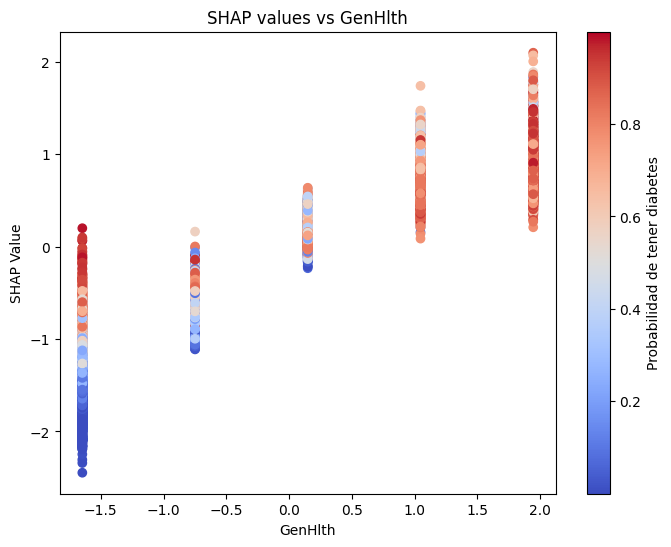

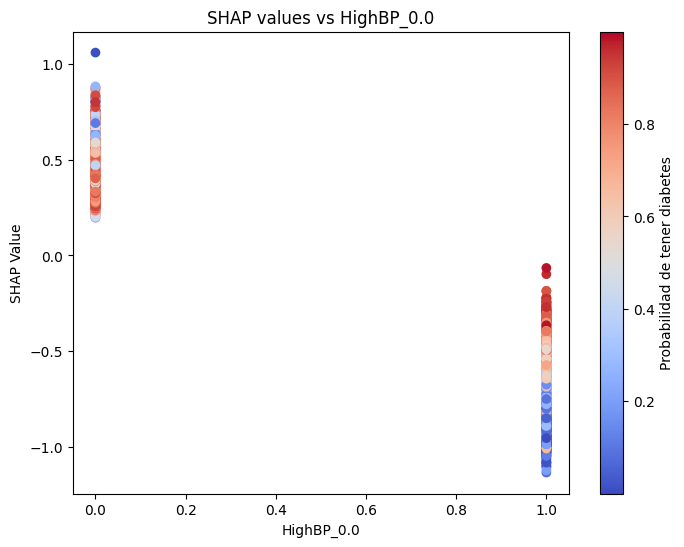

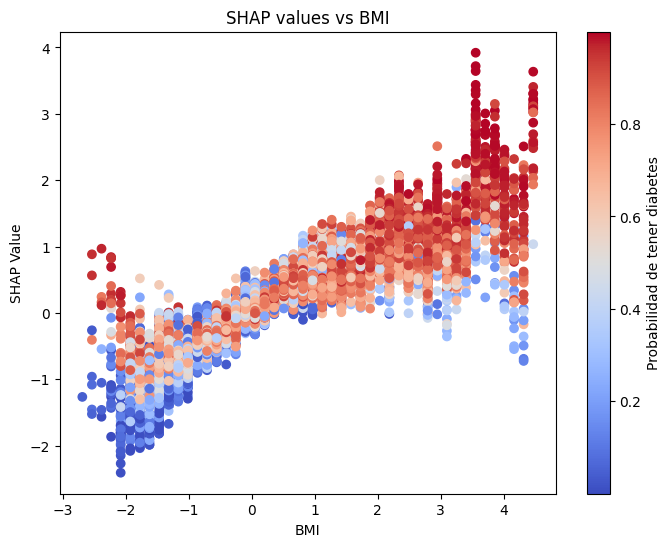

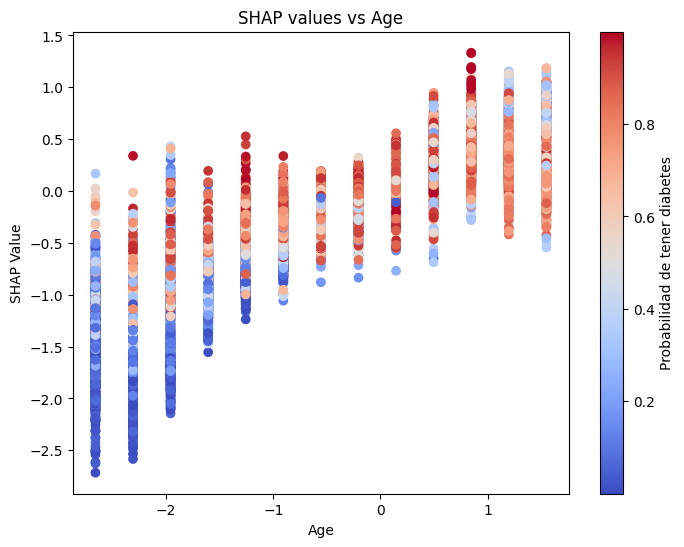

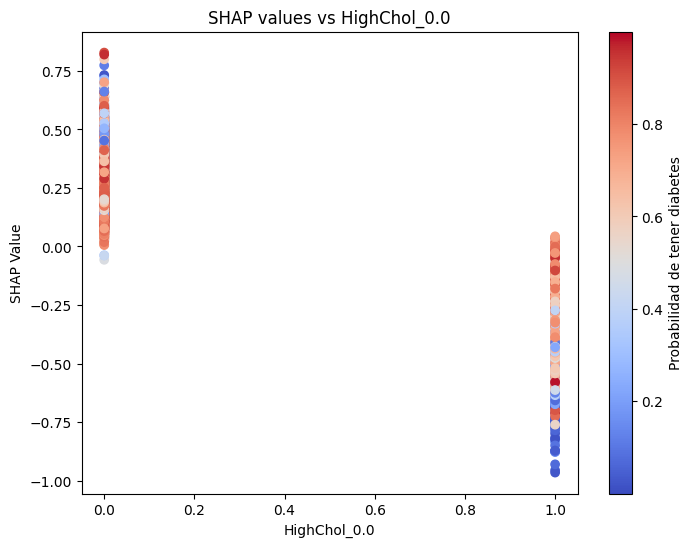

In [27]:
# Transforma X_train utilizando el preprocesador del pipeline
X_train_transformed = pipeline.named_steps['preprocessor'].transform(X)

# Obtener los nombres de las características transformadas
feature_names = get_feature_names(pipeline.named_steps['preprocessor'])

# Inicializar el explainer SHAP con el modelo
explainer = shap.Explainer(xgb_model)
shap_values = explainer(X_train_transformed)

# Calcula la importancia media de cada característica
shap_sum = np.abs(shap_values.values).mean(axis=0)
importance_df = pd.DataFrame({'feature': feature_names, 'shap_importance': shap_sum})
importance_df = importance_df.sort_values('shap_importance', ascending=False)

# Seleccionar las 5 características más importantes
top_features = importance_df['feature'].head(5)

# Calcular las predicciones del modelo
y_pred = xgb_model.predict_proba(X_train_transformed)[:, 1]

# Crear scatterplots para cada una de las 5 características principales
for feature in top_features:
    feature_idx = feature_names.index(feature)
    plt.figure(figsize=(8, 6))
    plt.scatter(X_train_transformed[:, feature_idx], shap_values.values[:, feature_idx], c=y_pred, cmap='coolwarm')
    plt.colorbar(label='Probabilidad de tener diabetes')
    plt.title(f'SHAP values vs {feature}')
    plt.xlabel(f'{feature}')
    plt.ylabel('SHAP Value')
    plt.show()


Si viene algunas variables presentan bastante variabilidad respecto al aporte de probabilidad positiva o negativa en la presencia de diabetes tenemos que principalmente una mayor GenHealth influye positivamente en la probabilidad de tener diabetes, de la misma manera más edad o un mayor indice de masa corporal tambien influyen en una mayor probabilidad de tener diabetes.

### 5.5 Partial Dependence Plot (0.4 puntos)

Finalmente, se le pide generar un gráfico del tipo **Partial Dependence Plot** para las mismas 5 variables con mayor impacto global usando una submuestra de **1000 observaciones**. ¿Qué relación existe entre la salida promedio del modelo y cada feature analizada? ¿Son estas conclusiones generalizables para todo el conjunto de datos?

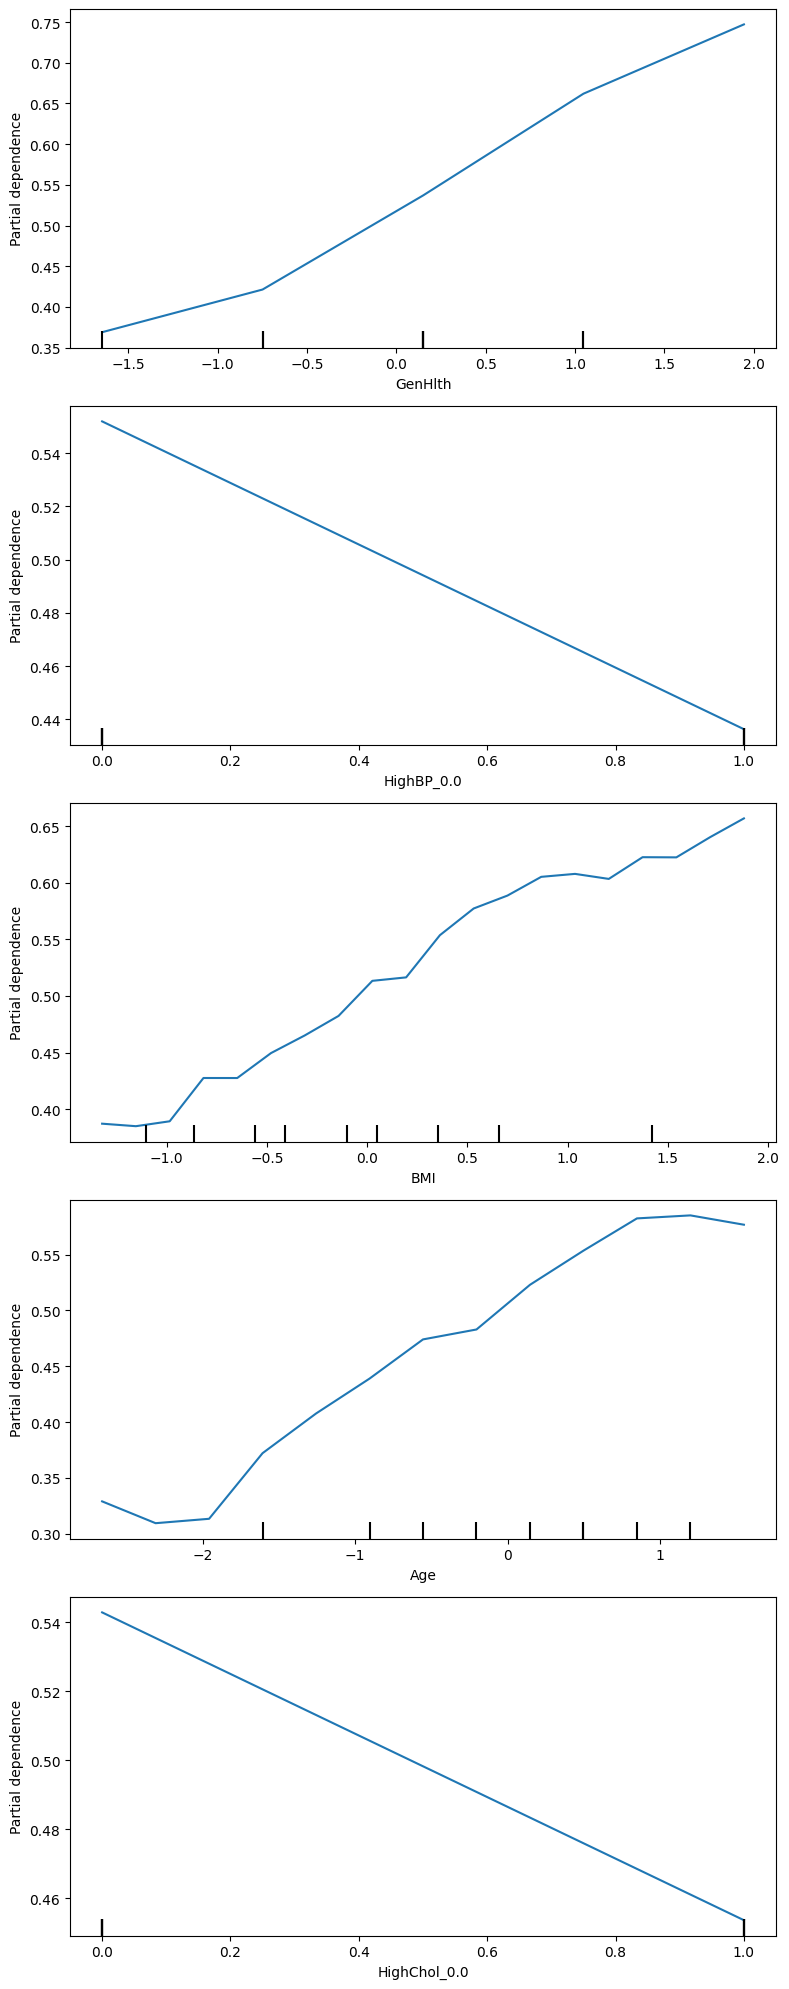

In [23]:
from sklearn.inspection import PartialDependenceDisplay
# Asegúrate de usar solo el preprocesador para transformar los datos
preprocessor = pipeline.named_steps['preprocessor']

# Selecciona una submuestra aleatoria de 1000 observaciones de X_train
np.random.seed(2)  # Para reproducibilidad
sample_indices = np.random.choice(X_train.shape[0], 1000, replace=False)
X_train_sample_transformed = preprocessor.transform(X_train.iloc[sample_indices])

# Asegúrate de que 'top_features' contiene las 5 características más importantes
# y que están disponibles después de la transformación

# Generar gráficos de Partial Dependence Plot
fig, ax = plt.subplots(len(top_features), figsize=(8, 20))
for i, feature in enumerate(top_features):
    feature_index = feature_names.index(feature)
    PartialDependenceDisplay.from_estimator(xgb_model, X_train_sample_transformed, [feature_index], ax=ax[i], grid_resolution=20, feature_names=feature_names)
plt.tight_layout()
plt.show()

Relación entre la salida promedio del modelo y cada feature:

Tenemos que el PDP aumenta a medida que aumenta GenHealth, Age y BMI,esto sugiere que, en promedio, el modelo tiende a prever una mayor probabilidad de diabetes a medida que estos valores aumentan. En contraste, el PDP indica que la salida del modelo disminuye linealmente a medida que aumentan las variables HighChol y HighBP. Esto sugiere que, en promedio, el modelo tiende a prever una menor probabilidad de diabetes a medida que estos valores aumentan.


Los PDP proporcionan una visión general de cómo las variables seleccionadas afectan la salida promedio del modelo en la submuestra de 1000 observaciones. Si bien pueden ser una buena representación no necesariamente son generalizables a todo el conjunto de datos, especialmente si hay interacciones complejas entre características.

## 6. Sistema de Reglas! (1.0 puntos)

<p align="center">
  <img src="https://media.baamboozle.com/uploads/images/125978/1638281150_1380186_gif-url.gif" width="400">
</p>

Después de todo el trabajo hecho, Dr. Simi le pide simplificar el funcionamiento de su modelo en un sistema de reglas que le permita explicar a sus clientes las predicciones que genera su modelo. En particular, Dr. Simi le pide explicar la decisión tomada para las observaciones **1000**, **3001** y **5751**. Con las reglas propuestas señale a **cuánta población** es posible explicar con estas reglas e indique la **precisión** que poseen las reglas en la totalidad de los datos. ¿Tienen sentido sus reglas propuestas para las observaciones?. Fundamente sus respuesta señalando el impacto que tienen sus reglas sobre todo el conjunto de datos.

In [24]:
!pip install alibi

In [25]:
from alibi.explainers import AnchorTabular

In [31]:
from alibi.explainers import AnchorTabular
import pandas as pd  # Importa la librería pandas

# Función de predicción que utiliza todo el pipeline
def predict_fn(X):
    # Crea un DataFrame temporal con nombres de características y luego realiza la predicción
    temp_df = pd.DataFrame(X, columns=feature_names)
    return pipeline.predict(temp_df)

# Nombres de características para el explicador
# Asegúrate de que esto corresponda a tus datos
feature_names = X_test.columns.tolist()

# Crear el explicador
explainer = AnchorTabular(predictor=predict_fn, feature_names=feature_names)

# Entrenar el explicador con un subconjunto representativo de tus datos
explainer.fit(X_train.values)

# Función para explicar una observación específica
def explain_observation(idx, explainer, X_test):
    explanation = explainer.explain(X_test.iloc[idx:idx+1].values)  # Usamos .values para obtener un numpy array
    print(f"Explicación para la observación {idx}:\n", explanation.anchor)
    print("Precisión de la explicación:", explanation.precision)
    print("Cobertura de la explicación:", explanation.coverage)

# Explicar predicciones específicas
indices = [1000, 3001, 5751]
for idx in indices:
    explain_observation(idx, explainer, X_test)

Explicación para la observación 1000:
 ['GenHlth > 2.00', 'HighChol > 0.00', 'Age > 9.00', 'BMI > 25.00']
Precisión de la explicación: 0.98005698005698
Cobertura de la explicación: 0.1446
Explicación para la observación 3001:
 ['GenHlth > 2.00', 'HighBP > 0.00', 'HighChol > 0.00']
Precisión de la explicación: 0.9611576542269612
Cobertura de la explicación: 0.2885
Explicación para la observación 5751:
 ['BMI <= 25.00', 'HighChol <= 0.00', 'Age <= 9.00', 'PhysHlth <= 6.00']
Precisión de la explicación: 0.9588607594936709
Cobertura de la explicación: 0.0978


1. **Observación 1000:**
   - La explicación sugiere que la predicción se basa en ciertos valores umbral para características como 'GenHlth', 'HighChol', 'Age' y 'BMI'. La precisión de la explicación es alta (98.0%), lo que significa que la regla propuesta tiene un alto grado de concordancia con la predicción del modelo para esta observación. Sin embargo, la cobertura es relativamente baja (14.46%), lo que indica que estas reglas no son aplicables a una gran proporción de la población.

2. **Observación 3001:**
   - La explicación sugiere que la predicción se basa en valores umbral para 'GenHlth', 'HighBP' y 'HighChol'. Al igual que en el caso anterior, la precisión es alta (96.12%), pero la cobertura es mayor (28.85%), lo que indica que estas reglas son aplicables a una proporción más grande de la población que las reglas de la observación 1000.

3. **Observación 5751:**
   - La explicación propone reglas basadas en umbrales para características como 'BMI', 'HighChol', 'Age' y 'PhysHlth'. Al igual que en los casos anteriores, la precisión es alta (95.89%), pero la cobertura es más baja (9.78%). Esto indica que estas reglas son aplicables a un subconjunto específico de la población.



En general, la precisión de las reglas es alta, lo que sugiere que las reglas propuestas son bastante confiables en términos de explicar la decisión del modelo para observaciones específicas. La cobertura varía entre las observaciones, pero en general, es relativamente baja. Esto significa que las reglas propuestas no son aplicables a un gran porcentaje de la población general.

Considerando lo anterior, las reglas propuestas por el explicador de anclas son específicas para cada observación y, por lo tanto, pueden no ser generalizables a todo el conjunto de datos. La baja cobertura indica que las reglas no cubren una parte significativa de la población, lo que limita su aplicabilidad a un contexto más amplio.



# Retrospectiva... (1.0 puntos)

En base a los diferentes métodos que implementa y ha comentado en este laboratorio, comente qué métodos le permiten entregar mejores conclusiones para la tarea de clasificación de diabetes. Por otro lado, ¿qué métodos son más útiles para el problema del doctor Simi, métodos agnosticos locales o globales?

Son más útiles los Métodos Agnósticos Locales, como Shap Values, Anchor Explanations, ya que finalmente se indica que el Dr. Simi está interesado en explicaciones a nivel local para poder comunicarse con los pacientes y explicar decisiones individuales, los métodos agnósticos locales, como Shap Values y Anchor Explanations, son particularmente útiles. Estos métodos proporcionan explicaciones interpretables para casos individuales y son esenciales en situaciones en las que se necesita entender el razonamiento detrás de decisiones específicas.

Cabe destacar que una combinación de métodos que aborde tanto la interpretación a nivel global como local es valiosa. Métodos como Partial Dependence Plots son útiles para comprender el comportamiento general del modelo, mientras que métodos agnósticos locales como Shap Values y Anchor Explanations son esenciales para proporcionar explicaciones detalladas y comprensibles a nivel individual, lo cual es crucial para la interacción con los pacientes.

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

![Gracias Totales!](https://media.tenor.com/ctnq4bhZE3gAAAAC/drsimi-simi.gif)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>